In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [42]:
def plot_imagens(imagens, altura, largura, n_linhas, n_cols, amostra):
    '''Para a visualização das imagens'''
    plt.figure(figsize = (2.5 * n_cols, 2.5 * n_linhas))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_linhas * n_cols):
        plt.subplot(n_linhas, n_cols, i + 1)
        plt.imshow(imagens[amostra[i]].reshape((altura, largura)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

In [24]:
def preto_e_branco(rgb):
    '''Converte a imagem colorida para uma imagem em preto e branco'''
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

Quantidade total de imagens: 15747.


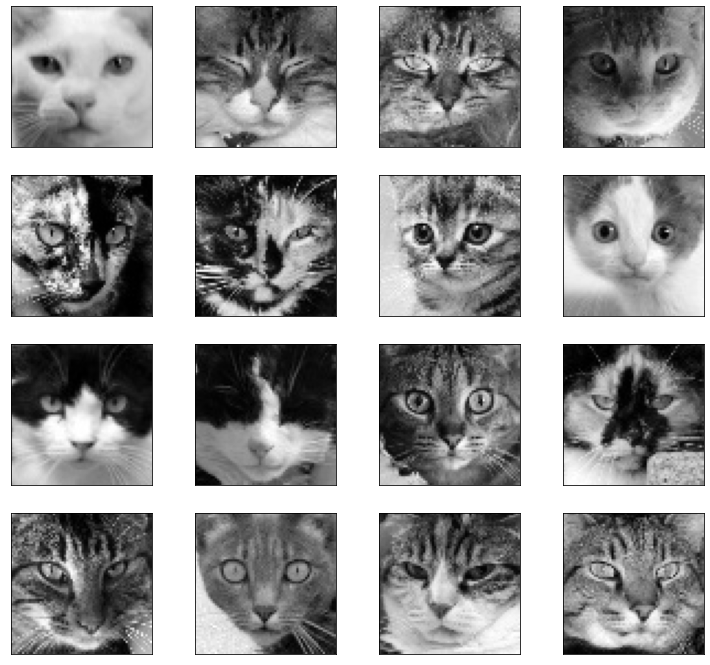

In [44]:
dir = os.getcwd() + '/imgs/cats' #diretório
nomes_imgs = os.listdir(dir)[:-1] #nomes das imagens

#lista dos paths para cada imagem:
path_imgs=[]
for nome in nomes_imgs:
    path_imgs.append(dir + '/' + nome)

imgs = np.array([plt.imread(img) for img in path_imgs]) #cria array das imgs

#Tranforma cada img colorida em preto e branco:
imgs_bw = []
for imagem in imgs:
    imgs_bw.append(preto_e_branco(imagem))
imgs_bw = np.array(imgs_bw)

#plota algumas imagens usando a função criada no começo:
num_imgs, altura, largura = imgs_bw.shape

amostra = random.sample(range(0, imgs_bw.shape[0]), 16) #amostra aleatória de imagens para plotar

plot_imagens(imgs_bw, altura, largura, n_linhas = 4, n_cols = 4, amostra=amostra)
print(f'Quantidade total de imagens: {imgs_bw.shape[0]}.')

(15747, 64, 64)


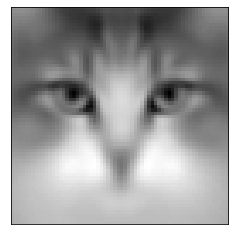

In [45]:
#Face média dos gatinhos :3
soma = np.zeros((imgs_bw.shape[1], imgs_bw.shape[2])) # array de zeros com as dimensões de cada imagem
for i in imgs_bw.tolist():
    soma += i
media = soma/imgs_bw.shape[0]
plt.imshow(media, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
print(imgs_bw.shape)